In [41]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.path.dirname('Utils'), '..')))
from Utils.data_utils import load_preprocessed_data_from_folder

# Load the data from the CSV file into a pandas DataFrame
data = load_preprocessed_data_from_folder()

data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502784,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.602571,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.563298,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3991,0.560356,0.434710,0.215044,0.535173,0.515598,0.341800,0.578386,0.497830,0.644700,1.0
3992,0.369342,0.453484,0.419993,0.555453,0.659636,0.310077,0.418230,0.518917,0.459890,1.0
3993,0.514873,0.394047,0.550464,0.706030,0.415335,0.544953,0.446907,0.582838,0.610959,1.0
3994,0.500670,0.484272,0.490260,0.783886,0.364165,0.535721,0.349975,0.552053,0.439660,1.0


In [42]:
def append_wqi(df, parameters, standards, weights):
    # Check if DataFrame contains all parameters
    missing_params = [param for param in parameters if param not in df.columns]
    if missing_params:
        raise ValueError(f"DataFrame is missing parameters: {', '.join(missing_params)}")

    # Calculate sub-indices for each parameter
    sub_indices = {param: df[param] / standards[param] for param in parameters}

    # Calculate WQI for each row
    wqi_values = []
    for index, row in df.iterrows():
        weighted_sum = sum(sub_indices[param][index] * weights[param] for param in parameters)
        wqi_values.append(weighted_sum)

    # Add WQI column to DataFrame
    df['WQI'] = wqi_values

    return df

IDEALS = {
    'ph': 7,
    'Hardness': 200,
    'Solids': 200,
    'Chloramines': 0.8,
    'Sulfate': 250,
    'Conductivity': 600,
    'Organic_carbon': 8,
    'Trihalomethanes': 13,
    'Turbidity': 2
}

WEIGHTS = {
    'ph': 0.1,
    'Hardness': 0.1,
    'Solids': 0.1,
    'Chloramines': 0.1,
    'Sulfate': 0.1,
    'Conductivity': 0.1,
    'Organic_carbon': 0.1,
    'Trihalomethanes': 0.1,
    'Turbidity': 0.1
}

WQI_PARAMETERS = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

data = append_wqi(data, WQI_PARAMETERS, IDEALS, WEIGHTS)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,WQI
0,0.502784,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0,0.099611
1,0.265434,0.297400,0.300611,0.491839,0.602571,0.719411,0.497319,0.450999,0.576793,0.0,0.104457
2,0.578509,0.641311,0.321619,0.698543,0.563298,0.414652,0.562017,0.532866,0.303637,0.0,0.122664
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0,0.128736
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0,0.101796
...,...,...,...,...,...,...,...,...,...,...,...
3991,0.560356,0.434710,0.215044,0.535173,0.515598,0.341800,0.578386,0.497830,0.644700,1.0,0.118784
3992,0.369342,0.453484,0.419993,0.555453,0.659636,0.310077,0.418230,0.518917,0.459890,1.0,0.107674
3993,0.514873,0.394047,0.550464,0.706030,0.415335,0.544953,0.446907,0.582838,0.610959,1.0,0.136956
3994,0.500670,0.484272,0.490260,0.783886,0.364165,0.535721,0.349975,0.552053,0.439660,1.0,0.136465


In [43]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
NUM_FOLDS = 5

train_df, test_df = train_test_split(data, test_size=TEST_SIZE)
train_df, test_df

(            ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
 1680  0.385764  0.545852  0.158408     0.589197  0.583674      0.563798   
 1769  0.690226  0.305703  0.395149     0.303886  0.794187      0.432664   
 81    0.394223  0.439971  0.200483     0.577591  0.600350      0.458306   
 750   0.451710  0.502591  0.376215     0.433735  0.619937      0.384398   
 3350  0.495697  0.510073  0.282364     0.647541  0.500060      0.257969   
 ...        ...       ...       ...          ...       ...           ...   
 3087  0.288004  0.553647  0.236422     0.479897  0.538083      0.590582   
 1495  0.512089  0.417300  0.645306     0.395801  0.487728      0.569272   
 3730  0.459523  0.514050  0.250146     0.431978  0.654524      0.437659   
 1092  0.520676  0.572002  0.282681     0.600689  0.758718      0.239662   
 2212  0.755566  0.836456  0.465161     0.190506  0.710954      0.267073   
 
       Organic_carbon  Trihalomethanes  Turbidity  Potability       WQI  
 1680       

In [44]:
# bisect the data into features and target (potability)
train_x = train_df.drop('Potability', axis=1)
train_y = train_df['Potability']

test_x = test_df.drop('Potability', axis=1)
test_y = test_df['Potability']

In [45]:
# Naive random forest model

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(train_x, train_y)

print(f'Random Forest test accuracy: {random_forest.score(test_x, test_y):0.2%}')

Random Forest test accuracy: 75.62%


In [46]:
from sklearn.model_selection import GridSearchCV

params = {
  'n_estimators': [100, 200],
  # 'max_depth': [None, 10, 20, 50],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(random_forest, params, scoring='f1', verbose=4, cv=NUM_FOLDS, n_jobs=-1)
grid_search.fit(train_x, train_y)

print(f'Random Forest test accuracy: {grid_search.score(test_x, test_y):0.2%}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest test accuracy: 74.50%


In [47]:
best_model = grid_search.best_estimator_
print(f'Best model: {best_model}, best params: {grid_search.best_params_}')

print(f'Best model score: {best_model.score(test_x, test_y):0.2%}')

Best model: RandomForestClassifier(criterion='entropy'), best params: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best model score: 74.50%


In [48]:
from sklearn.calibration import CalibratedClassifierCV

ideal_rf = RandomForestClassifier(**grid_search.best_params_)

calibrated_rf = CalibratedClassifierCV(ideal_rf, cv=NUM_FOLDS)
calibrated_rf.fit(train_x, train_y)

print(f'Calibrated Random Forest test accuracy: {calibrated_rf.score(test_x, test_y):0.2%}')

Calibrated Random Forest test accuracy: 74.88%


In [49]:
calibrated_rf.predict_proba(test_x)

array([[0.88120257, 0.11879743],
       [0.33997358, 0.66002642],
       [0.23092147, 0.76907853],
       ...,
       [0.85571637, 0.14428363],
       [0.50838679, 0.49161321],
       [0.21548586, 0.78451414]])

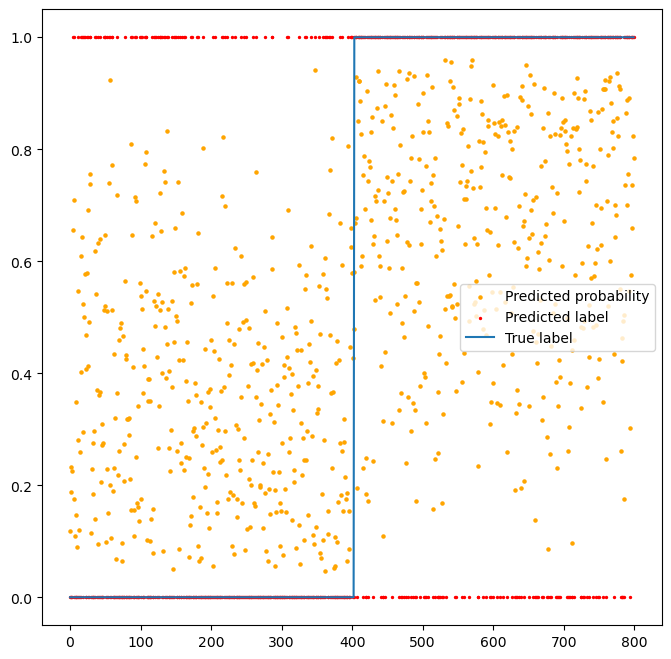

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Create a zipped array of sample index, predicted proability and true label
results = np.column_stack((calibrated_rf.predict_proba(test_x)[:, 1], calibrated_rf.predict(test_x), test_y))

# Sort by true label
results = results[results[:, 2].argsort()]

# Plot the predicted probabilities & true labels

plt.figure(figsize=(8, 8))
plt.scatter(range(len(results)), results[:, 0], label='Predicted probability', c='orange', s=5)
plt.scatter(range(len(results)), results[:, 1], label='Predicted label', c='red', s=2)
plt.plot(results[:, 2], label='True label')
plt.legend()

plt.show()


